In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
initial_data = yf.download("AMZN", start="2022-03-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,152.732498,154.098999,149.977005,151.141998,151.141998,44874000
2022-03-02,150.848999,152.999496,148.750000,152.052505,152.052505,47334000
2022-03-03,153.531494,153.929001,146.856003,147.898499,147.898499,65198000
2022-03-04,147.158997,147.850006,143.807007,145.641006,145.641006,60934000
2022-03-07,145.443497,146.094498,137.416504,137.453003,137.453003,86934000


In [4]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600


In [5]:
initial_data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,522.00,522.00,522.00,522.00,522.00,5.220000e+02
mean,0.05,0.05,0.06,0.06,0.06,-1.306973e+04
std,3.09,2.80,2.81,3.11,3.11,2.354361e+07
min,-16.01,-15.18,-18.68,-20.31,-20.31,-1.238820e+08
25%,-1.71,-1.48,-1.38,-1.67,-1.67,-9.375375e+06
50%,0.08,0.13,0.13,0.08,0.08,-1.393500e+05
75%,1.74,1.48,1.57,1.85,1.85,8.329650e+06
max,13.58,14.81,14.33,12.67,12.67,1.553460e+08


# ADJUSTED VALUES

In [6]:
adj_close_data = initial_data["Adj Close"]
adj_close_stats = adj_close_data.diff().describe().round(2)
adj_close_stats_df = pd.DataFrame(adj_close_stats)
print(adj_close_stats_df)

       Adj Close
count     522.00
mean        0.06
std         3.11
min       -20.31
25%        -1.67
50%         0.08
75%         1.85
max        12.67


In [7]:
import matplotlib.pyplot as plt

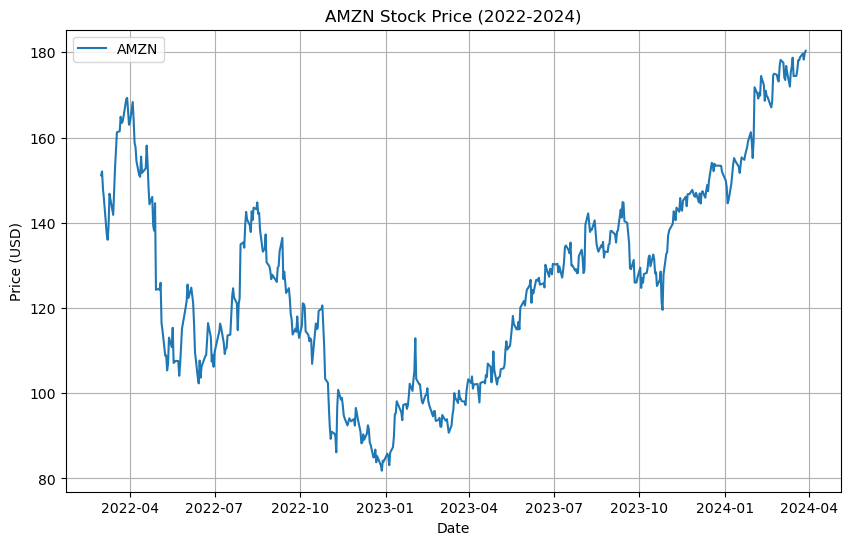

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(initial_data['Adj Close'], label="AMZN")
plt.title(f'AMZN Stock Price (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
initial_price_2022 = initial_data.loc["2022-04-01"]["Adj Close"]
end_price_2023 = initial_data.loc["2023-03-31"]["Adj Close"]
initial_price_2023 = initial_data.loc["2023-04-03"]["Adj Close"]
end_price_2024 = initial_data.loc["2024-03-28"]["Adj Close"]

log_return_2022 = np.log(end_price_2023 / initial_price_2022)
log_return_2023 = np.log(end_price_2024 / initial_price_2023)

print("Log Return for 2022-2023:", log_return_2022)
print("Log Return for 2023-2024:", log_return_2023)

Log Return for 2022-2023: -0.45963930568756967
Log Return for 2023-2024: 0.5660813639605106


In [10]:
log_return_2022_2023 = -0.45963930568756967
log_return_2023_2024 = 0.5660813639605106

total_log_return = log_return_2022_2023 + log_return_2023_2024

print("Total Log Return for 2022-2023:", total_log_return)

Total Log Return for 2022-2023: 0.1064420582729409


In [11]:
total_log_return_2022_2024 = 0.1064420582729409

average_log_return = total_log_return / 2

print(average_log_return)

0.05322102913647045


In [12]:
import numpy as np

### ANNUALIZED AVERAGE LOG RETURN


[*********************100%%**********************]  1 of 1 completed


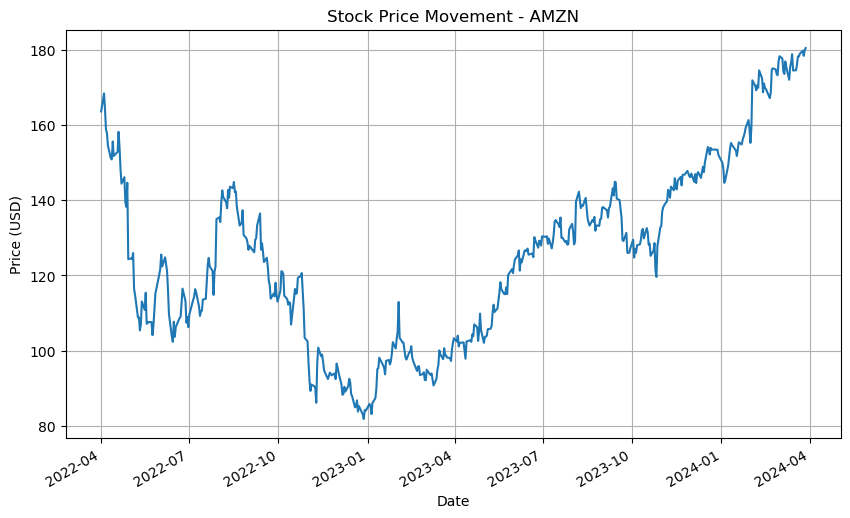

Annualized Average Log Return: 0.049433351855349666
Annualized Standard Deviation: 0.4026613228137741


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select equity (e.g., AMAZON - AMZN)
ticker = 'AMZN'

# Step 2: Download historical data
data = yf.download(ticker, start='2022-04-01', end='2024-04-01')

# Step 3: Plot price movement
plt.figure(figsize=(10, 6))
data['Adj Close'].plot()
plt.title('Stock Price Movement - ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Step 4: Calculate daily log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Calculate annualized average log return
annualized_avg_log_return = data['Log Returns'].mean() * 252  # 252 trading days in a year

# Step 5: Calculate annualized standard deviation
annualized_std_dev = data['Log Returns'].std() * np.sqrt(252)

print('Annualized Average Log Return:', annualized_avg_log_return)
print('Annualized Standard Deviation:', annualized_std_dev)

In [14]:
SP = initial_data['Adj Close'].iloc[-1]  # Current stock price
K = 400  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = annualized_std_dev  # Volatility
N = 5  # Number of steps for binomial tree

In [18]:

import numpy as np

import pandas as pd

import yfinance as yf

from scipy.stats import norm
 
# Step 1: Option Design

S0 = yf.download("AMZN", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price

K = 165  # Strike price

T = 1  # Time to expiration (1 year)

r = 0.04  # Risk-free rate

sigma = 0.4  # Volatility
 
# Step 2a: Binomial Trees Option Pricing

def binomial_option_pricing(S0, K, T, r, sigma, n, option_type='call'):

    dt = T / n

    u = np.exp(sigma * np.sqrt(dt))

    d = 1 / u

    p = (np.exp(r * dt) - d) / (u - d)

    prices = np.zeros((n + 1, n + 1))

    option_values = np.zeros((n + 1, n + 1))

    for j in range(n + 1):

        prices[j, n] = S0 * (u ** (n - j)) * (d ** j)

        option_values[j, n] = max(0, prices[j, n] - K) if option_type == 'call' else max(0, K - prices[j, n])

    for i in range(n - 1, -1, -1):

        for j in range(i + 1):

            prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

            option_values[j, i] = np.exp(-r * dt) * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])

    return option_values[0, 0]
 
n = 100  # Number of steps in the binomial tree

binomial_price = binomial_option_pricing(S0, K, T, r, sigma, n)
 
# Step 2b: Black-Scholes-Merton Option Pricing

def black_scholes_option_pricing(S0, K, T, r, sigma, option_type='call'):

    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':

        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

    else:

        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

    return option_price
 
black_scholes_price = black_scholes_option_pricing(S0, K, T, r, sigma)
 
# Step 2c: Monte Carlo Simulation Option Pricing

def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps, option_type='call'):

    dt = T / num_steps

    simulations = np.zeros((num_simulations, num_steps + 1))

    simulations[:, 0] = S0

    for i in range(num_simulations):

        for j in range(1, num_steps + 1):

            z = np.random.normal(0, 1)

            simulations[i, j] = simulations[i, j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

    if option_type == 'call':

        payoffs = np.maximum(simulations[:, -1] - K, 0)

    else:

        payoffs = np.maximum(K - simulations[:, -1], 0)

    option_price = np.mean(payoffs) * np.exp(-r * T)

    return option_price
 
num_simulations = 100000

num_steps = 252  # Assuming 252 trading days in a year

monte_carlo_price = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, num_steps)
 
# Step 3: Comparison of Results

print("Binomial Tree Option Price:", binomial_price)

print("Black-Scholes Option Price:", black_scholes_price)

print("Monte Carlo Option Price:", monte_carlo_price)


[*********************100%%**********************]  1 of 1 completed


Binomial Tree Option Price: 39.13906687478246
Black-Scholes Option Price: 39.153513802251126
Monte Carlo Option Price: 38.936295326204466


In [17]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600


## BINOMIAL TREE 

[*********************100%%**********************]  1 of 1 completed


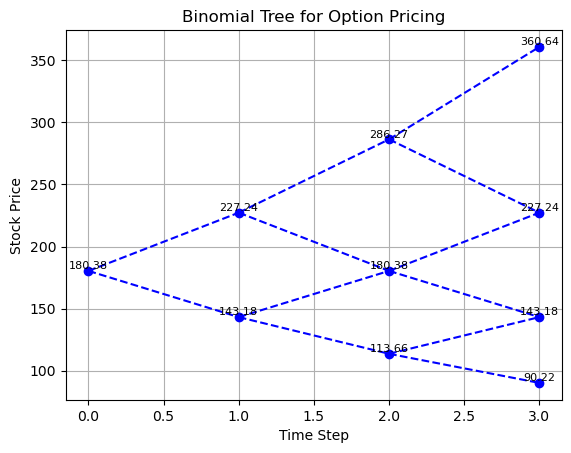

Option Values at Final Nodes:
 [[  0.           0.           0.         195.64211191]
 [  0.           0.           0.          62.23980544]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]


In [19]:

import numpy as np
import matplotlib.pyplot as plt

# Function to generate binomial tree
def generate_binomial_tree(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            tree[i, j] = S0 * (u ** (j - i)) * (d ** i)
    
    return tree

# Function to calculate option value at each final node
def calculate_option_value(tree, K, option_type='call'):
    n = tree.shape[1] - 1
    option_values = np.zeros_like(tree)
    for i in range(n+1):
        option_values[i, n] = max(0, tree[i, n] - K) if option_type == 'call' else max(0, K - tree[i, n])
    return option_values

# Plot binomial tree
def plot_binomial_tree(tree):
    n = tree.shape[1] - 1
    for j in range(n+1):
        for i in range(j+1):
            plt.plot(j, tree[i, j], 'bo')
            plt.text(j, tree[i, j], f'{tree[i, j]:.2f}', va='bottom', ha='center', fontsize=8)
    
    for j in range(n):
        for i in range(j+1):
            plt.plot([j, j+1], [tree[i, j], tree[i, j+1]], 'b--')
            plt.plot([j, j+1], [tree[i, j], tree[i+1, j+1]], 'b--')

    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for Option Pricing')
    plt.grid(True)
    plt.show()

# Parameters
S0 = yf.download("AMZN", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 165    # Strike price
T = 1      # Time to expiration (1 year)
r = 0.04   # Risk-free rate
sigma = 0.4   # Volatility
n = 3      # Number of steps in the binomial tree

# Generate binomial tree
tree = generate_binomial_tree(S0, K, T, r, sigma, n)
plot_binomial_tree(tree)

# Calculate option value at each final node
option_values = calculate_option_value(tree, K)
print("Option Values at Final Nodes:\n", option_values)

In [20]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
        # Price process, see Hilpisch (2015) chapter 1 (equation 1-1) & chapter 3 (equation 3-6)
    return S

In [21]:
T = 1
r = 0.04
sigma = 0.4
S0 = yf.download("AMZN", start="2022-04-01", end="2024-04-01")["Adj Close"].iloc[-1]  # Current stock price
K = 165

[*********************100%%**********************]  1 of 1 completed


In [22]:
S = mcs_simulation_np(1000)

In [23]:
S = np.transpose(S)
S

array([[180.38000488, 183.33812165, 182.34775142, ..., 130.47011952,
        128.29376186, 127.68371502],
       [180.38000488, 180.91673717, 183.0009098 , ..., 304.02202303,
        305.59403309, 308.77139658],
       [180.38000488, 178.94064651, 176.13749303, ..., 328.60512227,
        326.22849494, 327.12255696],
       ...,
       [180.38000488, 178.76466739, 174.44259611, ...,  94.86555277,
         95.01938847,  93.58071186],
       [180.38000488, 178.37045706, 180.27902287, ..., 140.54915983,
        139.35896115, 136.73493452],
       [180.38000488, 181.1510992 , 181.64944196, ..., 135.50509113,
        134.66816243, 134.04399254]])

In [71]:
# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(np.arange(num_steps + 1), simulations[i], alpha=0.5)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation for Call Option Pricing')
plt.grid(True)
plt.show()

# Plot histogram of option prices
plt.figure(figsize=(10, 6))
plt.hist(simulations[:, -1], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Option Price')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Call Option Prices')
plt.grid(True)
plt.show()

NameError: name 'simulations' is not defined

<Figure size 1000x600 with 0 Axes>

## MONTE CARLE

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

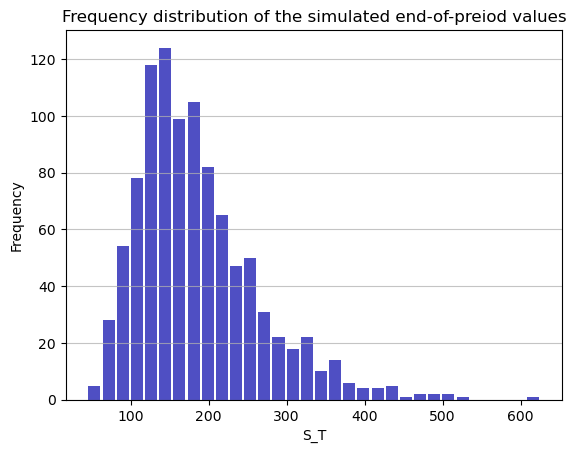

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [26]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: 180
    #K: 165
    #T: 1
    #r: 0.04
    #vol: 0.4
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [27]:
euro_option_bs(180, 165, 1, 0.04, 0.4, 'call')

38.888070633424306

In [28]:
euro_option_bs(185, 165, 1, 0.04, 0.4, 'put')

15.96565862738423

In [29]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 165, 1, 0.04, 0.4, 'call')
    Put [i] = euro_option_bs(S[i], 165, 1, 0.04, 0.4, 'put')

## OPTION VALUE 

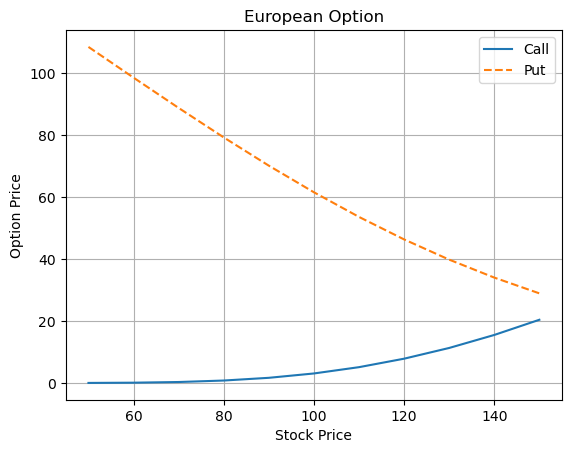

In [30]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [31]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [32]:
delta(180, 165, 1, 0.04, 0.4, 'call')

0.69760634031291

In [33]:
delta(180, 165, 1, 0.04, 0.4, 'put')

-0.30239365968709

In [34]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 165, 1, 0.04, 0.4, 'call')
    Delta_Put [i] = delta(S[i], 165, 1, 0.04, 0.4, 'put')

## DELTA 

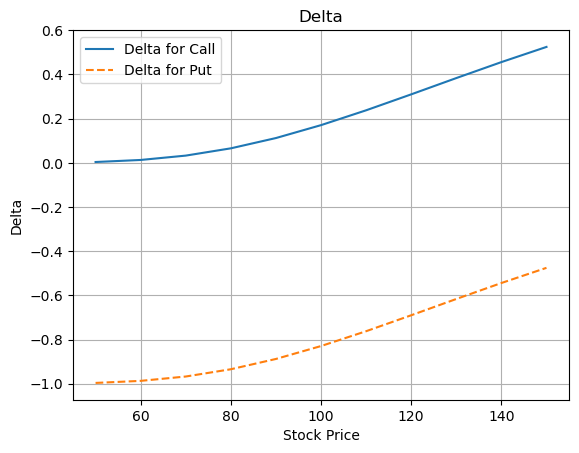

In [35]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [36]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [37]:
gamma(180, 165, 1, 0.04, 0.4, 'call')

0.0048463836244576584

In [38]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 165, 1, 0.04, 0.4, 'call')

## GAMMA

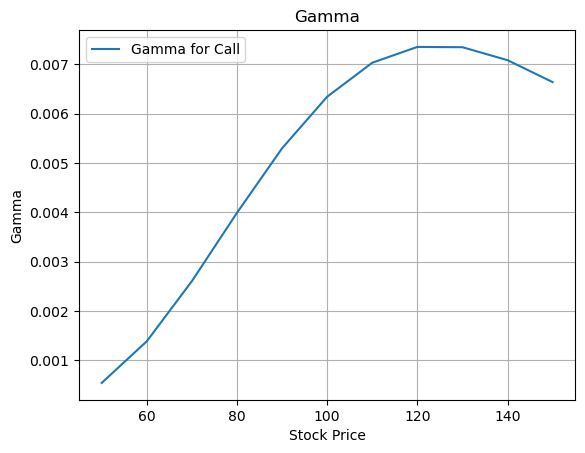

In [39]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [40]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [41]:
theta(180, 165, 1, 0.04, 0.4, 'call')

-16.02906917951023

In [42]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 0.05, 0.25, 'call')

## THETA 

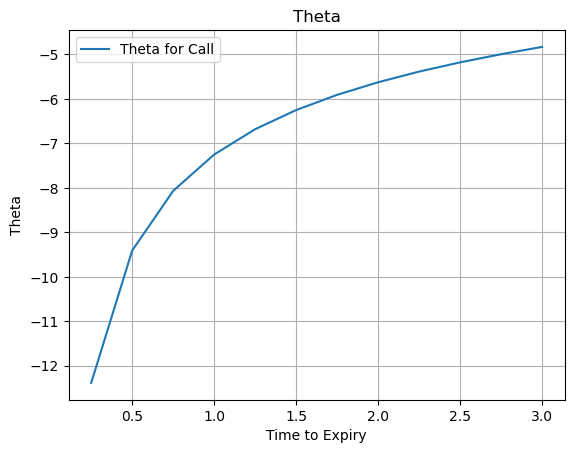

In [44]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [45]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
   
    return rho

In [46]:
rho(180, 165, 1, 0.04, 0.4, 'call')

86.6810706228995

In [47]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 1, r[i], 0.25, 'call')

## RHO

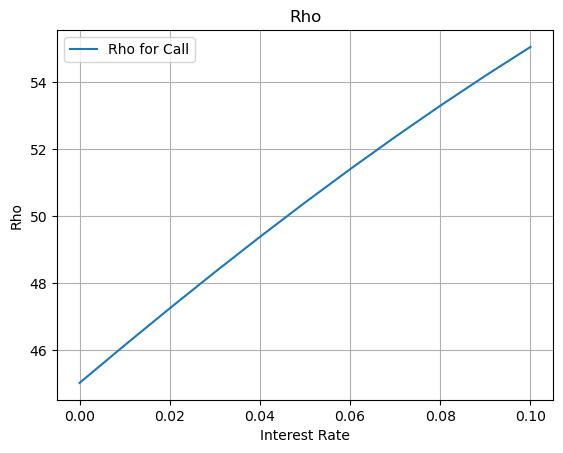

In [49]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [50]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega


In [51]:
vega(180, 165, 1, 0.04, 0.4, 'call')

62.80913177297125

In [52]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, vol[i], 'call')

## VEGA

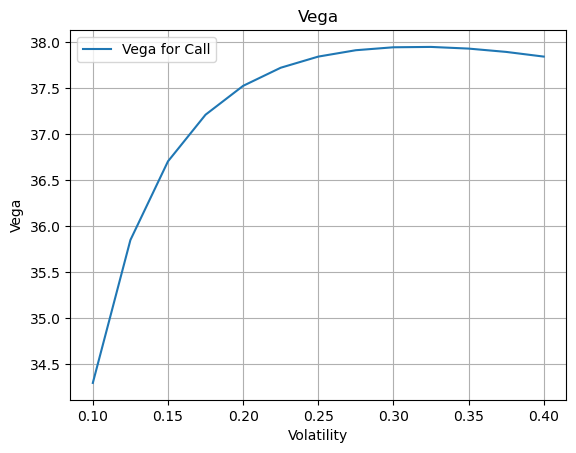

In [53]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])